# [Kaggle Titanic](https://www.kaggle.com/competitions/titanic/data)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


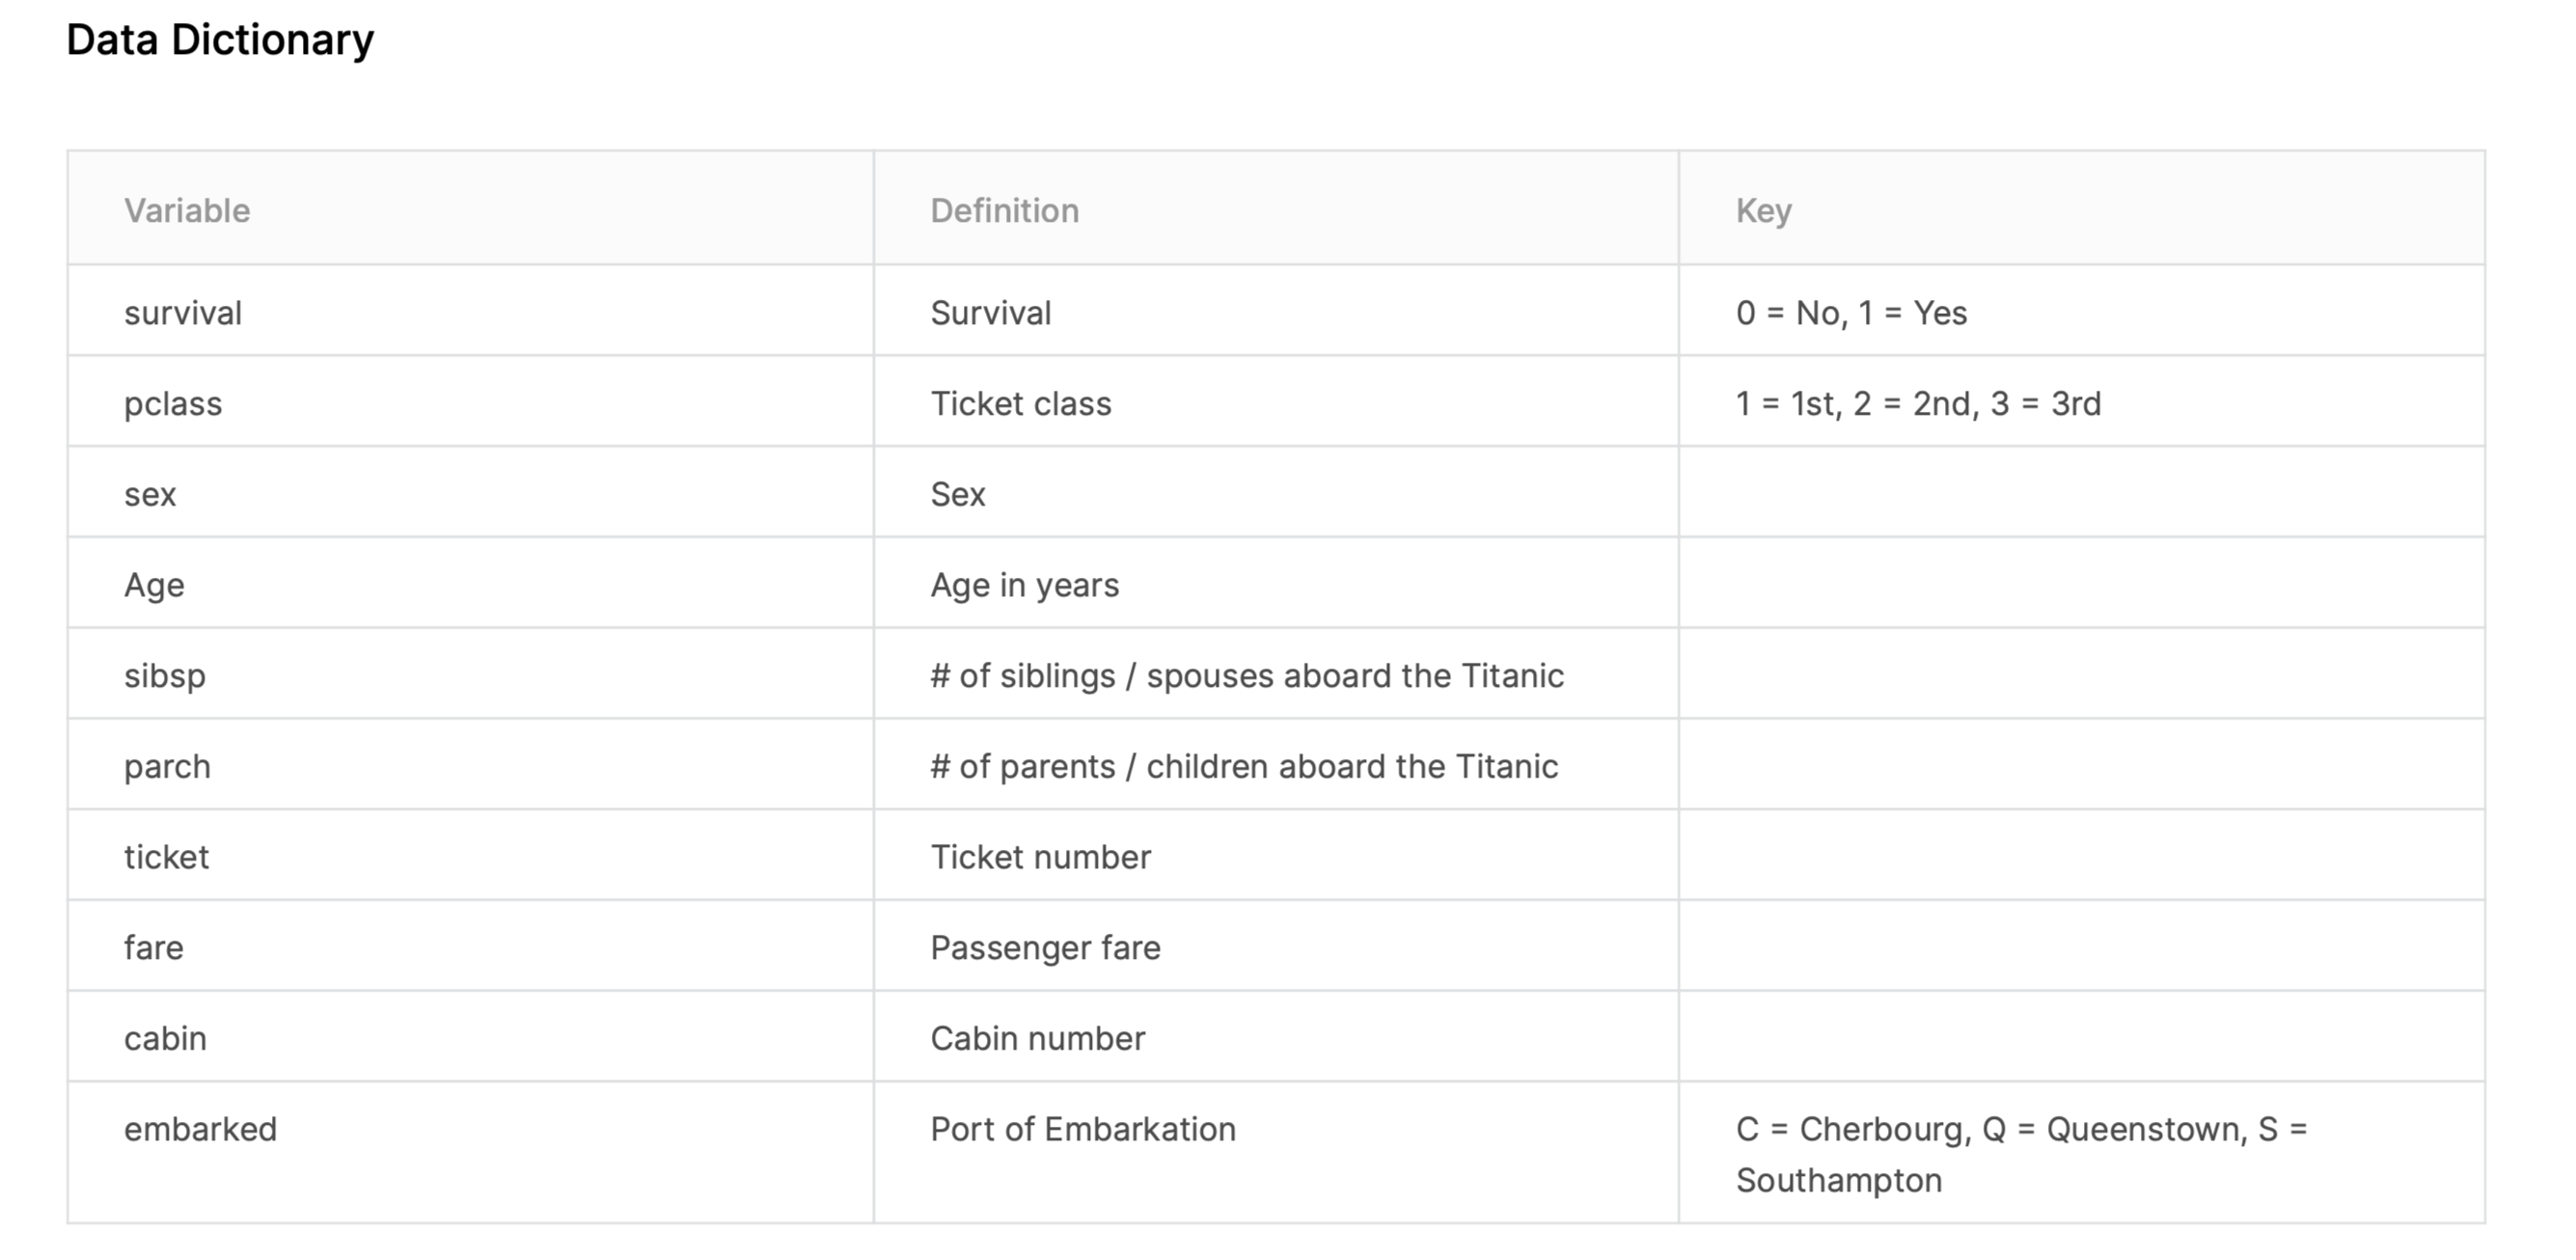

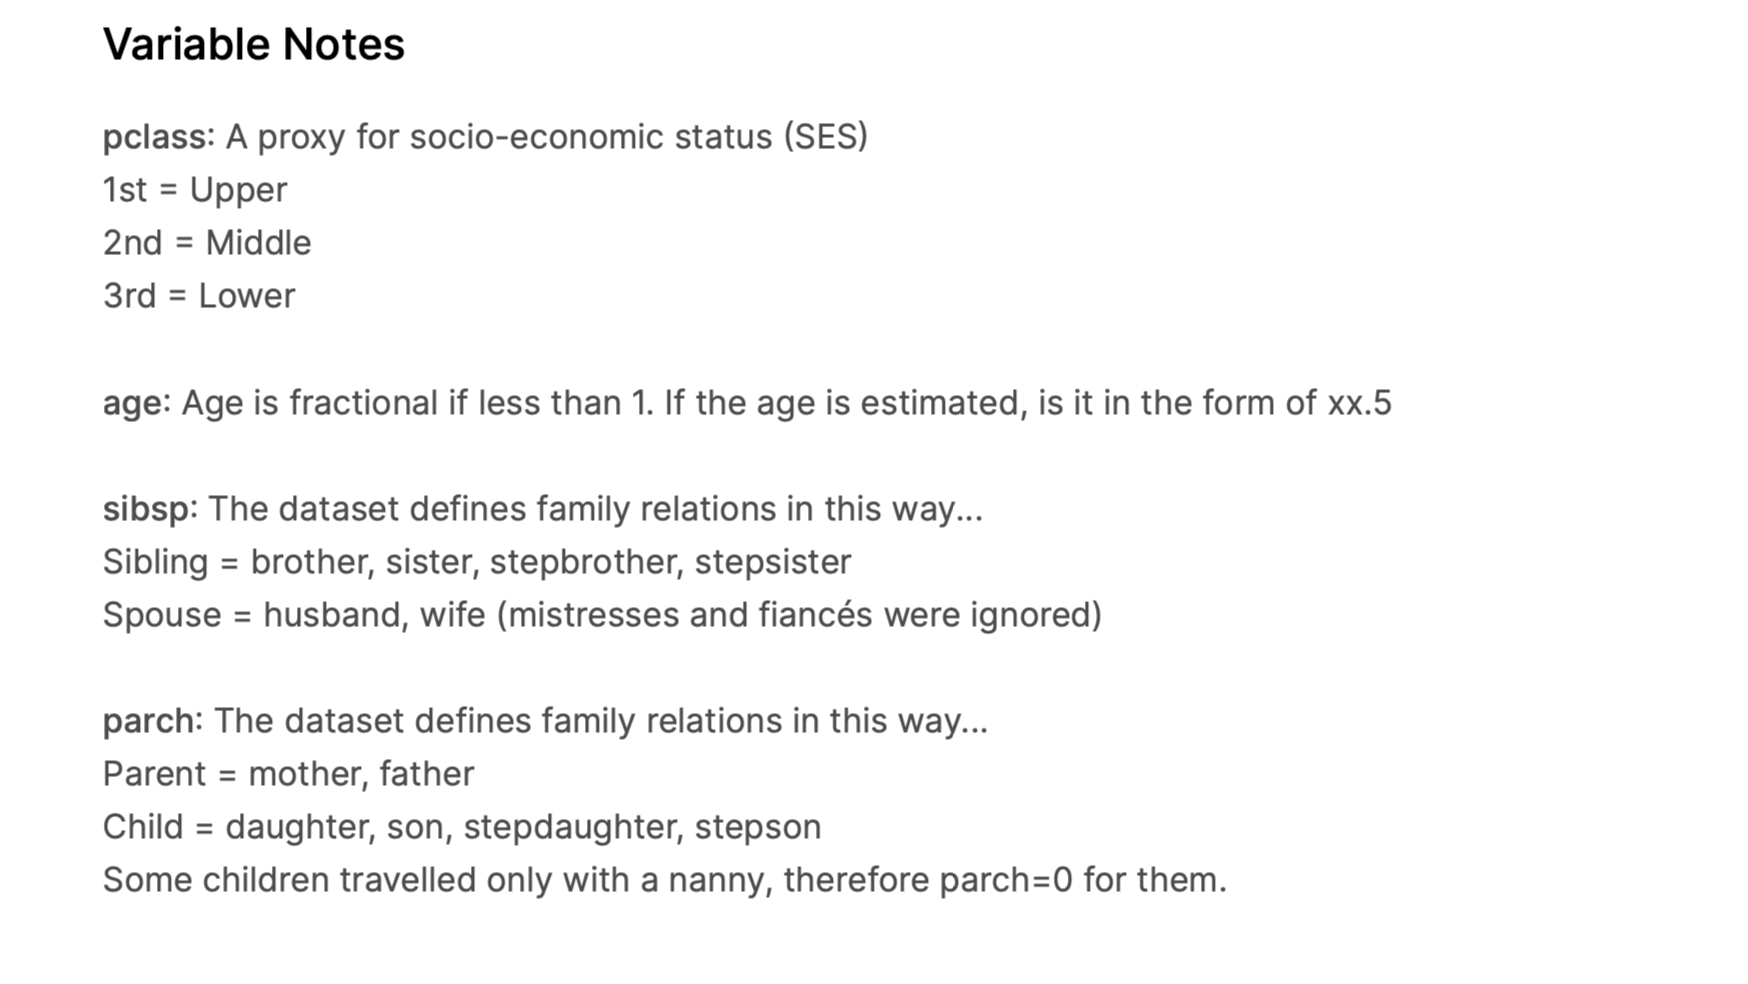

## EDA

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Cabin遺失值太多，故直接刪除
train = train.drop(['PassengerId', 'Cabin'], axis = 1)
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [13]:
# 解決中文無法顯示的問題
# 查看電腦所有的字體
import matplotlib
font_list=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in font_list:
    print (i)

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Comic Sans MS
Copperplate
Corsiva Hebrew
Courant
Courant
Courant
Courant
Courier
Courier New
Courier New
Courier New
Courier New
DFKai-SB
DFKai-SB
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
D

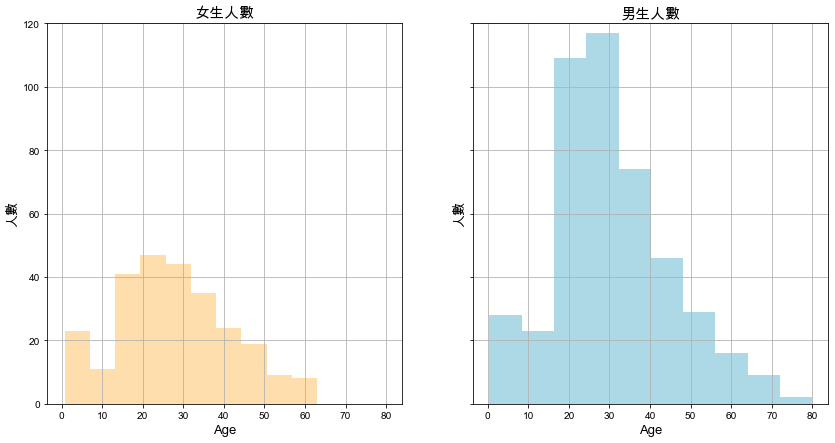

In [14]:
from matplotlib.font_manager import FontProperties as font
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (14, 7))
ax1.hist(train[train['Sex'] == 'female']['Age'], color = 'navajowhite')
ax1.set_title('女生人數', fontsize = 15)
ax1.set_xlabel('Age', fontsize = 13)
ax1.set_ylabel('人數', fontsize = 13)
ax1.set_ylim(0, 120)
ax1.grid(True)

ax2.hist(train[train['Sex'] == 'male']['Age'], color = 'lightblue')
ax2.set_title('男生人數', fontsize = 15)
ax2.set_xlabel('Age', fontsize = 13)
ax2.set_ylabel('人數', fontsize = 13)
ax2.set_ylim(0, 120)
plt.grid(True)

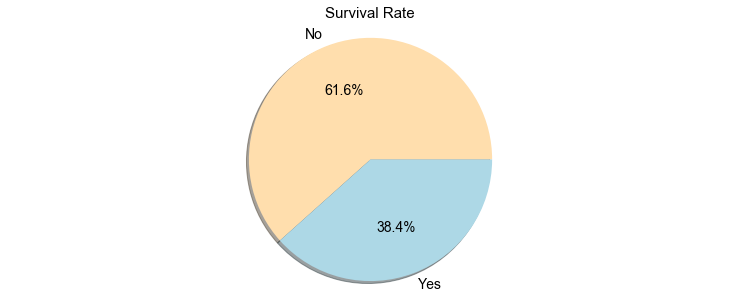

In [15]:
# 生存比例
from matplotlib.font_manager import FontProperties as font
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize = (13, 5))
plt.title("Survival Rate", fontsize = 15)
plt.pie(train.groupby('Survived')['Survived'].count(), labels = ['No', 'Yes'], shadow=True, autopct='%1.1f%%',
        colors = ['navajowhite', 'lightblue'], textprops={'fontsize': 14})


plt.axis('equal')
plt.show()

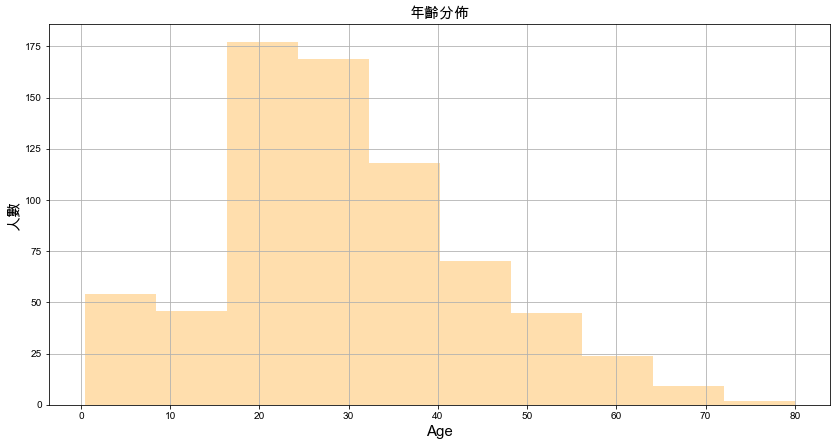

In [16]:
from matplotlib.font_manager import FontProperties as font
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize = (14, 7))
plt.hist(train['Age'], color = 'navajowhite')
plt.title('年齡分佈', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('人數', fontsize = 15)
plt.grid(True)

# 主要集中在20~40歲

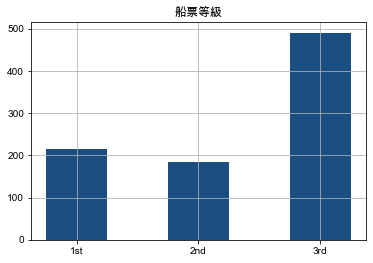

In [17]:
from matplotlib.font_manager import FontProperties as font
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

bars = ['1st', '2nd', '3rd']
height = train.groupby('Pclass')['Pclass'].count()
x_pos = [1, 2, 3]

plt.bar(x_pos, height, width=0.5, color = (0.1, 0.3, 0.5))
plt.title('船票等級')
plt.xticks(x_pos, bars)

plt.grid(True)
# 3rd明顯最多人

<AxesSubplot:>

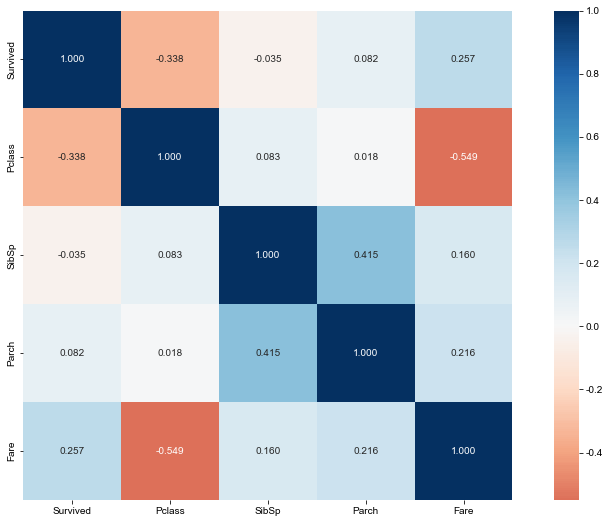

In [18]:
# 各欄的相關係數
plt.figure(figsize = (15, 9))
sns.heatmap(train.loc[:,['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']].corr(), fmt='.3f', 
            center=0, cmap="RdBu", annot=True, square=True)

# https://matplotlib.org/stable/tutorials/colors/colormaps.html#lightness-of-matplotlib-colormaps

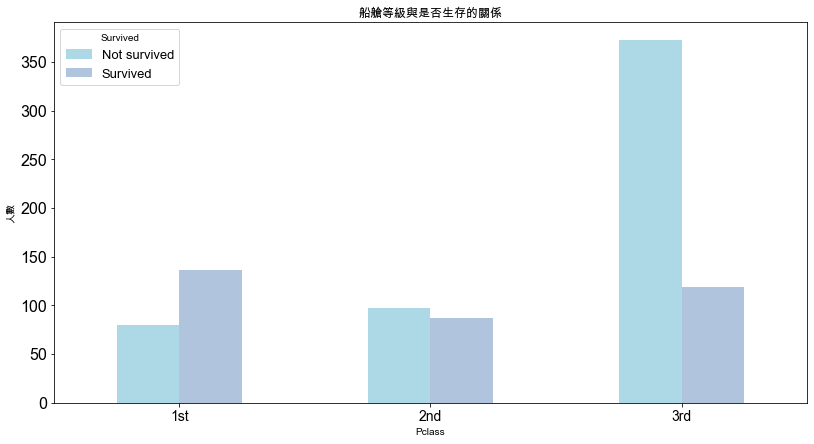

In [19]:
train.groupby(['Pclass', 'Survived']).size().unstack().plot(kind = 'bar'
                                                         , color = ['lightblue', 'lightsteelblue']
                                                         , title = '船艙等級與是否生存的關係'
                                                         , ylabel = '人數', legend = False
                                                         , figsize = (13.5, 7), fontsize = 16)
plt.legend(['Not survived', 'Survived'], title = 'Survived', fontsize = 13, loc = 'upper left')
plt.xticks(ticks = range(0,3) ,labels = ['1st', '2nd', '3rd'], rotation=0, fontsize = 14)
plt.show()
# Lower Pclass多數未生還

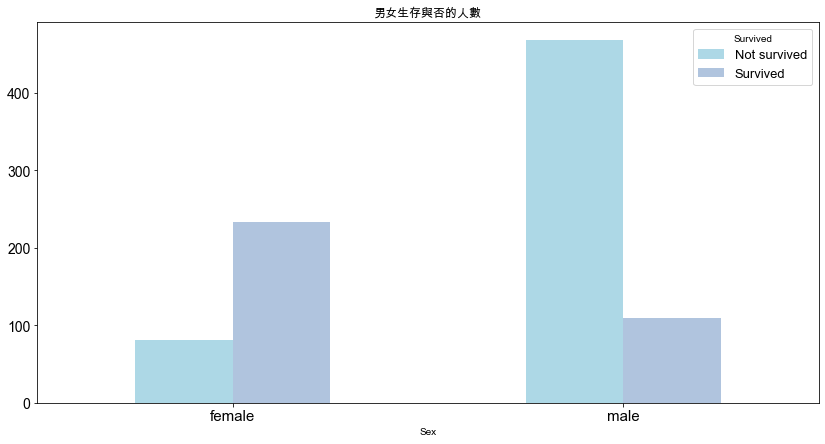

In [20]:
train.groupby(['Sex', 'Survived']).size().unstack().plot(kind = 'bar'
                                                         , color = ['lightblue', 'lightsteelblue']
                                                         , title = '男女生存與否的人數', fontsize = 14
                                                         , figsize = (14, 7))
plt.legend(['Not survived', 'Survived'], title = 'Survived', fontsize = 13)
plt.xticks(ticks = range(0,2) ,labels = ['female', 'male'], rotation=0, fontsize = 15)
plt.show()
# 男生大多數未生還

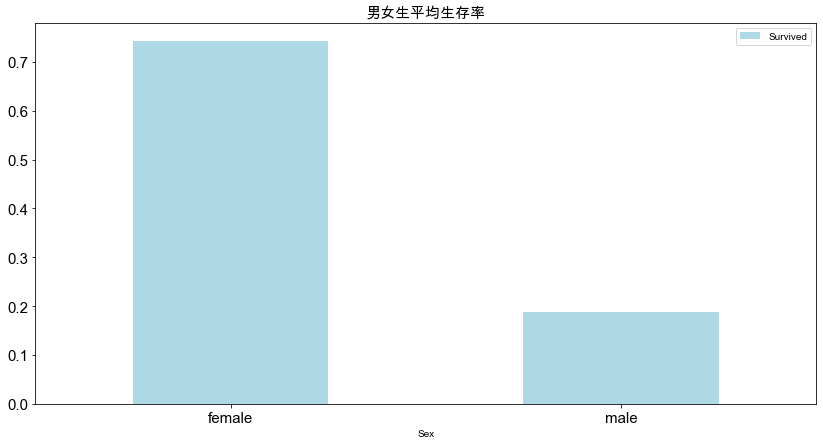

In [21]:
train.groupby('Sex')[['Sex', 'Survived']].mean().plot(kind = 'bar'
                                                    , color = ['lightblue', 'lightsteelblue']
                                                    , figsize = (14, 7), fontsize = 15)
plt.title('男女生平均生存率', fontsize = 15)
plt.xticks(ticks = range(0,2) ,labels = ['female', 'male'], rotation=0, fontsize = 15)
plt.show()
# 女生生存率比男生高很多

Text(0.5, 1.0, '登船港口&性別')

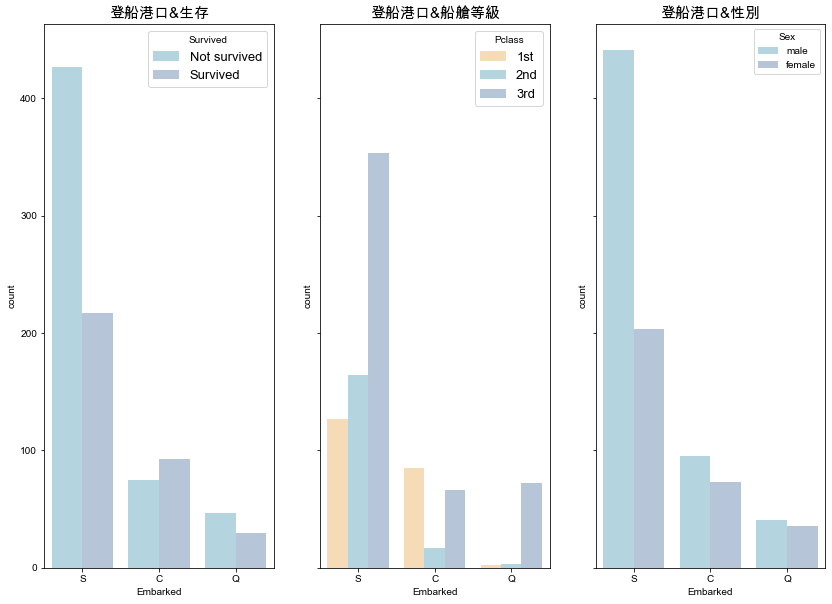

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (14, 10))

sns.countplot(x='Embarked', hue='Survived', data = train, ax = ax1, palette=['lightblue', 'lightsteelblue'])
sns.countplot(x='Embarked', hue='Pclass', data = train, ax = ax2, palette=['navajowhite', 'lightblue', 'lightsteelblue'])
sns.countplot(x='Embarked', hue='Sex', data = train, ax = ax3, palette=['lightblue', 'lightsteelblue'])
     
ax1.legend(['Not survived', 'Survived'], title = 'Survived', fontsize = 13)
ax2.legend(['1st', '2nd', '3rd'], title = 'Pclass', fontsize = 13)

ax1.set_title('登船港口&生存', fontsize = 15)
ax2.set_title('登船港口&船艙等級', fontsize = 15)
ax3.set_title('登船港口&性別', fontsize = 15)

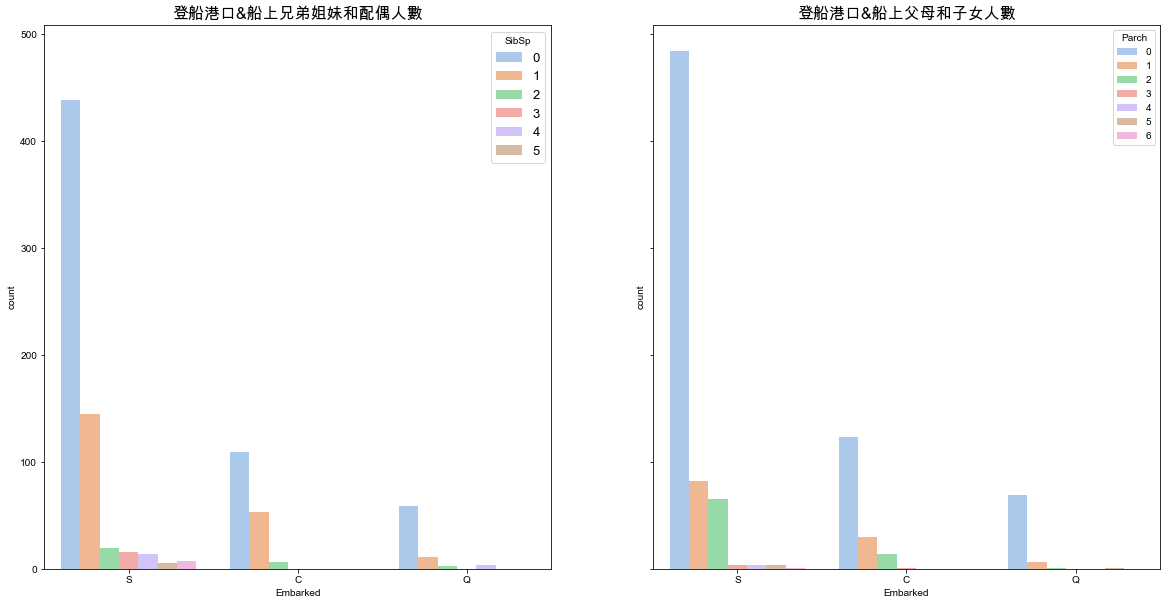

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20, 10))

sns.countplot(x='Embarked', hue='SibSp', data = train, ax = ax1, palette= 'pastel')
sns.countplot(x='Embarked', hue='Parch', data = train, ax = ax2, palette= 'pastel')
ax1.legend([i for i in range(6)], title = 'SibSp', fontsize = 13, loc = 'upper right')
ax1.set_title('登船港口&船上兄弟姐妹和配偶人數', fontsize = 16)
ax2.set_title('登船港口&船上父母和子女人數', fontsize = 16)

plt.show()

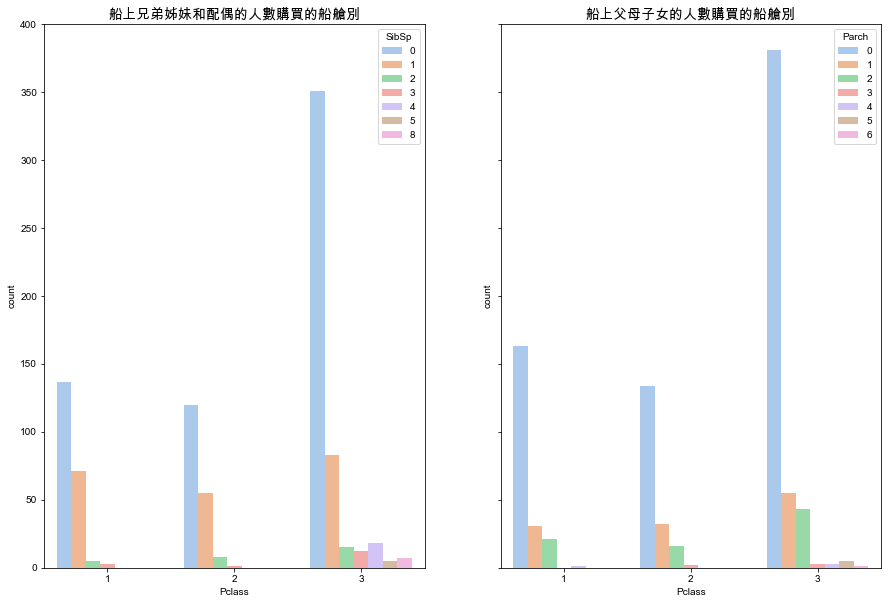

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (15, 10))
sns.countplot(x='Pclass', hue='SibSp', data = train, ax = ax1, palette= 'pastel')
sns.countplot(x='Pclass', hue='Parch', data = train, ax = ax2, palette= 'pastel')

ax1.set_title('船上兄弟姊妹和配偶的人數購買的船艙別', fontsize = 14)
ax2.set_title('船上父母子女的人數購買的船艙別', fontsize = 14)
plt.show()

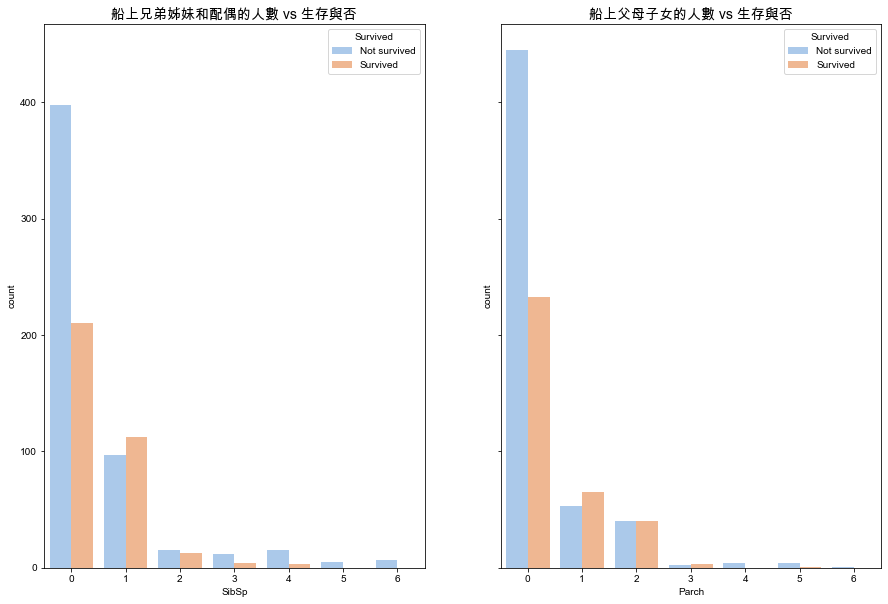

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (15, 10))

sns.countplot(x='SibSp', hue='Survived', data = train, ax = ax1, palette= 'pastel')
sns.countplot(x='Parch', hue='Survived', data = train, ax = ax2, palette= 'pastel')

ax1.set_title('船上兄弟姊妹和配偶的人數 vs 生存與否', fontsize = 14)
ax2.set_title('船上父母子女的人數 vs 生存與否', fontsize = 14)

ax1.legend(['Not survived', 'Survived'], title = 'Survived', loc = 'upper right')
ax2.legend(['Not survived', 'Survived'], title = 'Survived', loc = 'upper right')
plt.show()
# 無家人的人生存率明顯較低

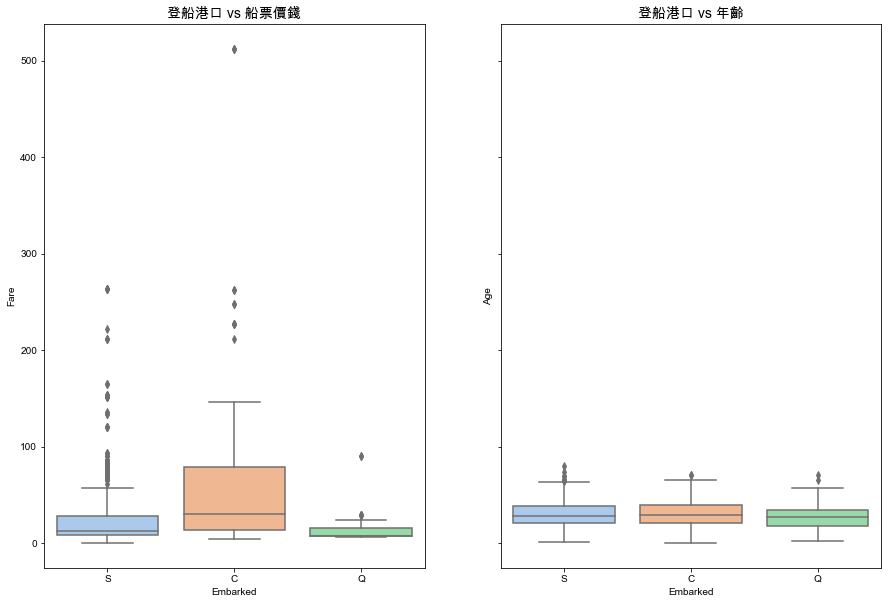

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (15, 10))
sns.boxplot(x='Embarked', y='Fare', data = train, palette = 'pastel', ax=ax1)
ax1.set_title('登船港口 vs 船票價錢', fontsize = 14)

sns.boxplot(x='Embarked', y='Age', data = train, palette = 'pastel', ax=ax2)
ax2.set_title('登船港口 vs 年齡', fontsize = 14)

plt.show()

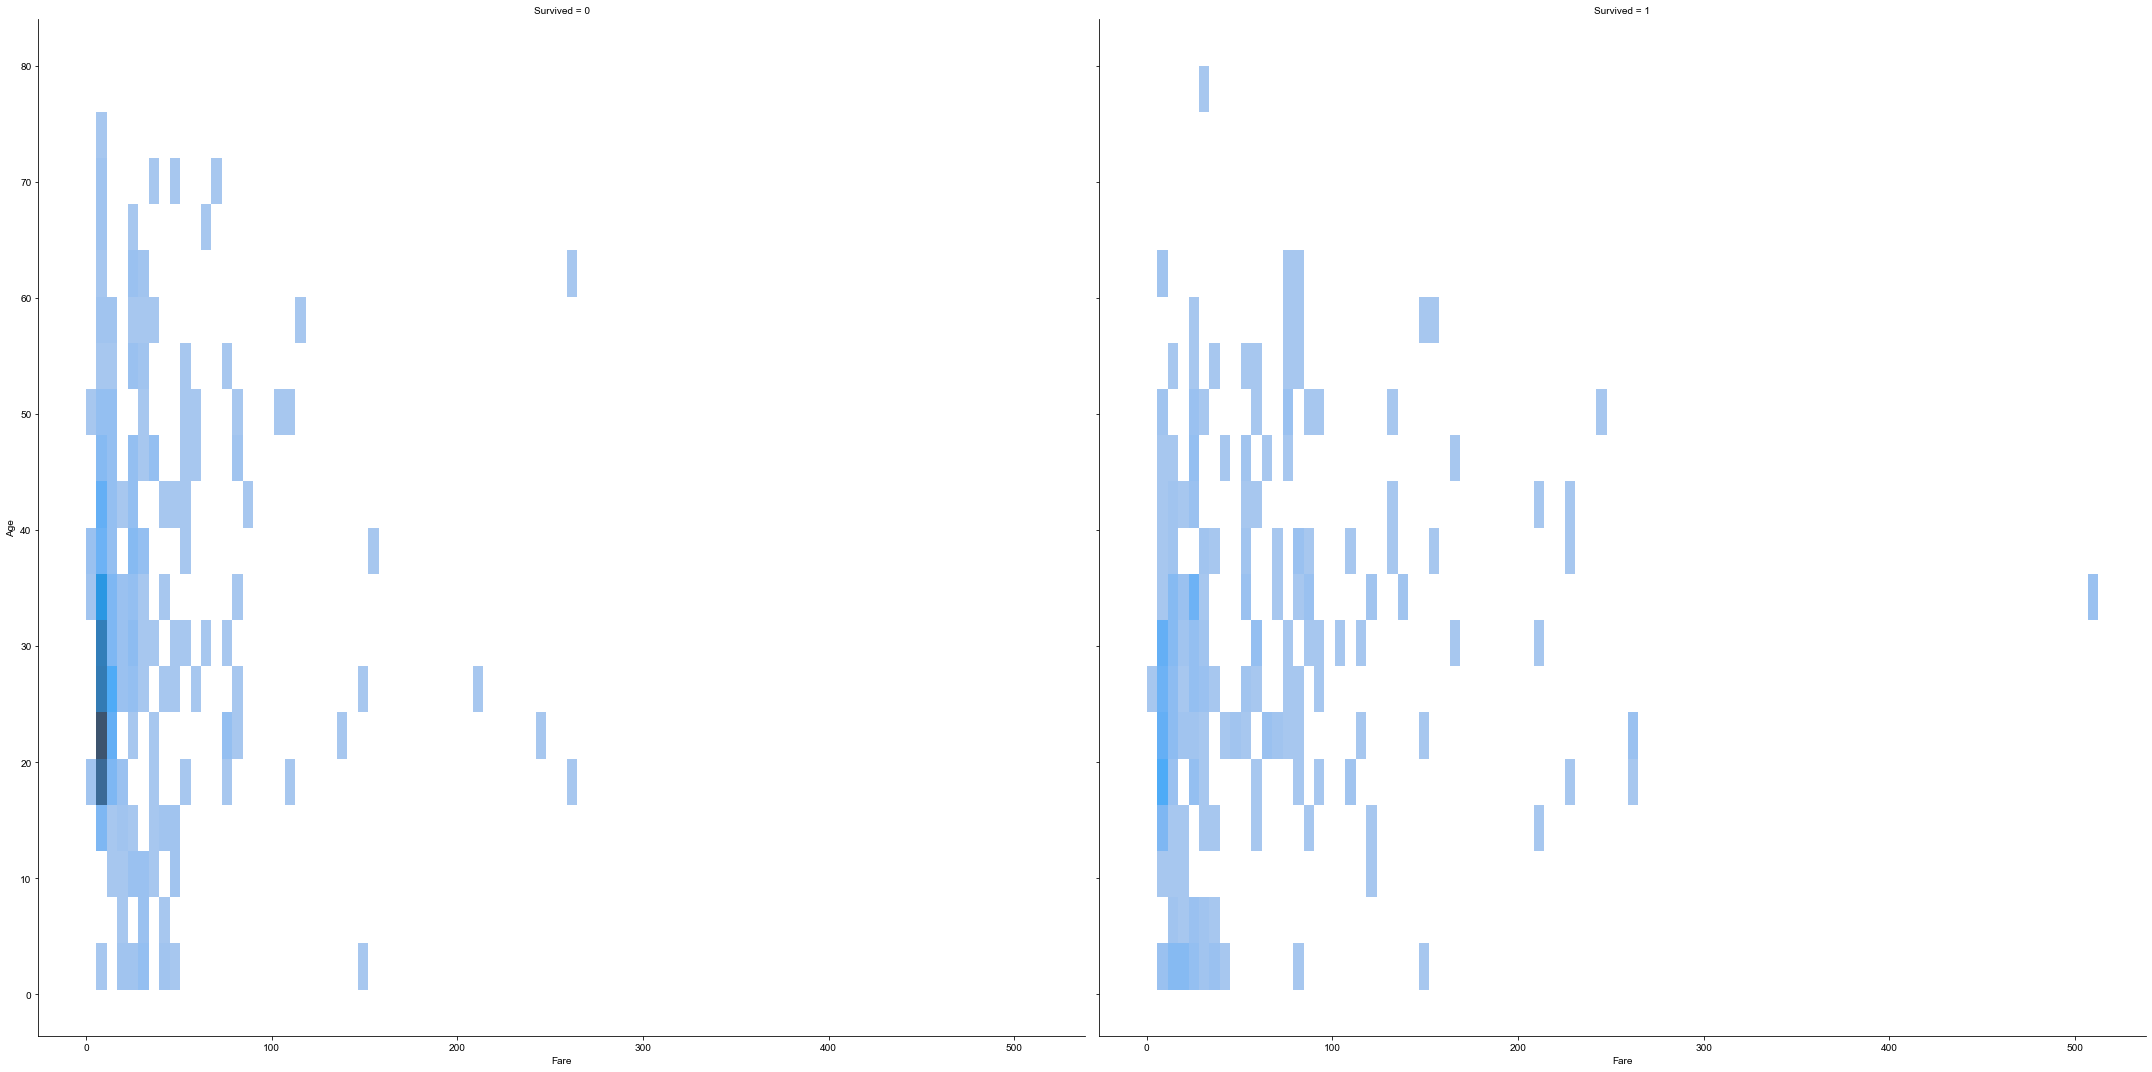

In [27]:
sns.displot(x = 'Fare',y = 'Age',col='Survived', data = train, height=15, aspect=1)
plt.show()

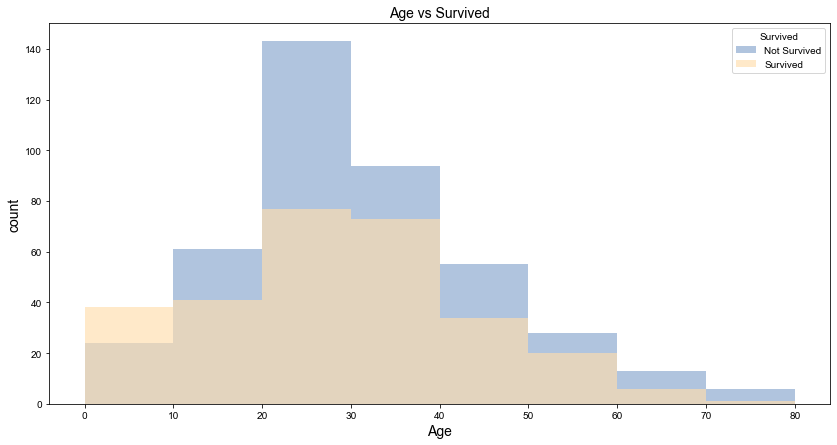

In [28]:
plt.figure(figsize = (14, 7))
y1 = train[train['Survived']==0]['Age']
y2 = train[train['Survived']==1]['Age']

x1 = np.arange(len(y1))
x2 = np.arange(len(y2))

bins = [10*i for i in range(9)]
plt.hist(y1, bins = bins, color = 'lightsteelblue', label='Not Survived')
plt.hist(y2, bins = bins, alpha = 0.65, color = 'navajowhite', label='Survived')
plt.title('Age vs Survived', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.legend(title = 'Survived')
plt.show()

In [29]:
age_cut = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', age_cut], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

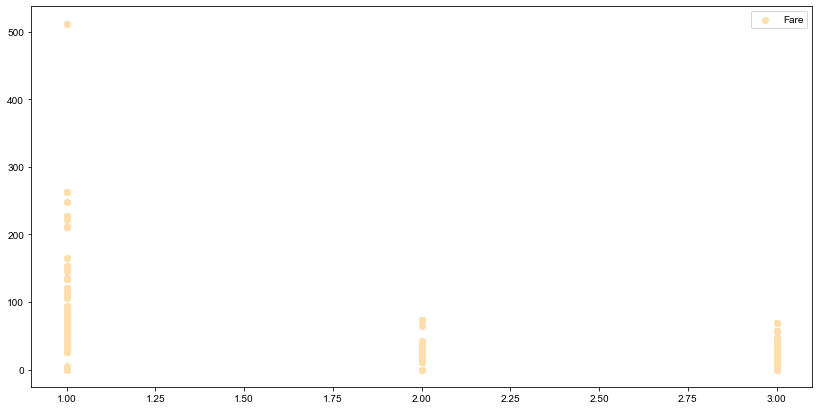

In [30]:
plt.figure(figsize = (14, 7))
plt.scatter(x = train['Pclass'], y = train['Fare'], color = 'navajowhite', label = 'Fare')
plt.legend(loc = 'upper right')
plt.show()

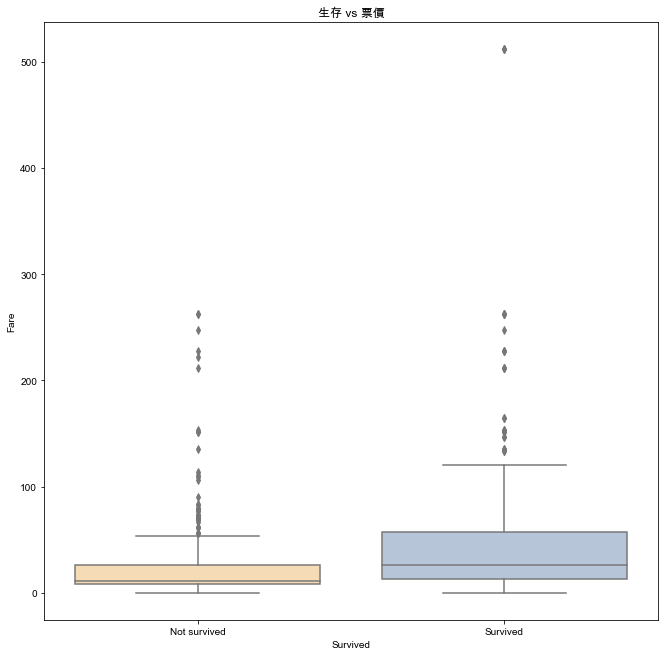

In [31]:
plt.figure(figsize = (11, 11))
sns.boxplot(x='Survived', y='Fare', data = train, palette = ['navajowhite', 'lightsteelblue'])
plt.title('生存 vs 票價')
plt.xticks(ticks = range(0,2) ,labels = ['Not survived', 'Survived'], rotation=0)
plt.show()

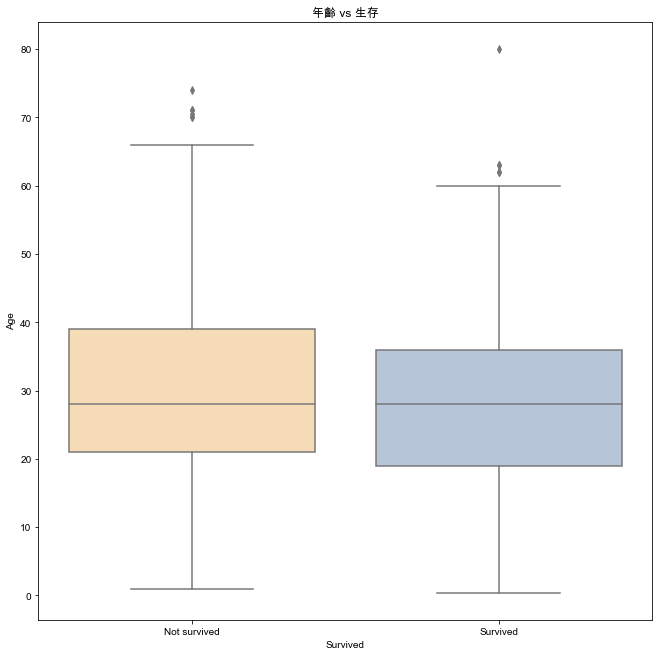

In [32]:
plt.figure(figsize = (11, 11))
sns.boxplot(x='Survived', y='Age', data = train, palette = ['navajowhite', 'lightsteelblue'])
plt.title('年齡 vs 生存')
plt.xticks(ticks = range(0,2) ,labels = ['Not survived', 'Survived'], rotation=0)
plt.show()

## 特徵工程

In [33]:
# 正規表示法

import re
regex = re.compile(' ([A-Za-z]+)\.')
train['honorific'] = train['Name'].map(lambda x: regex.search(x)[0])
train['honorific'] = train['honorific'].map(lambda x: x[1:][:-1])  # 去掉'.'
print(train['honorific'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: honorific, dtype: int64


In [34]:
train['honorific'] = train['honorific'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess',
                                                 'Capt', 'Ms', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'other')
train['honorific'] = train['honorific'].replace(['Miss', 'Mlle'], 'Miss')
train['honorific'] = train['honorific'].replace('Mme', 'Mrs')
print(train['honorific'].value_counts())

Mr        517
Miss      184
Mrs       126
Master     40
other      24
Name: honorific, dtype: int64


In [35]:
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
honorific      0
dtype: int64

In [36]:
# 補遺失值
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace = True)  # S人數最多  因此遺失值用S補

In [37]:
# 看年齡是否為遺失值
# 0:NA
train['Age_isna?'] = train['Age'].isnull().map(lambda x: 0 if x == True else 1)
train['Age_isna?'].head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Age_isna?, dtype: int64

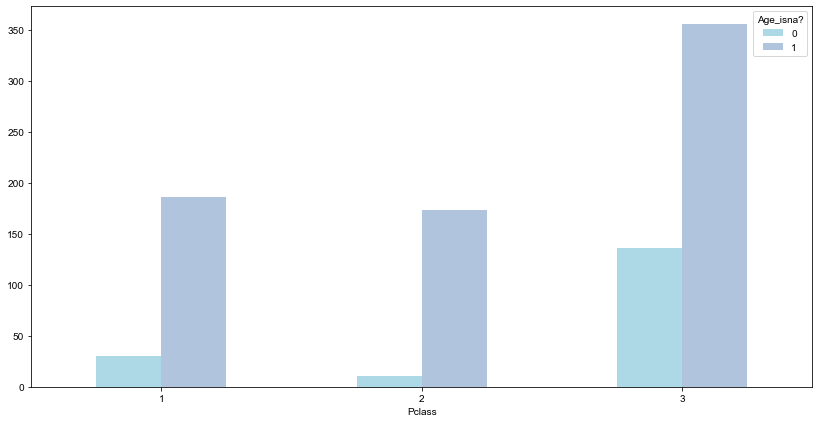

In [38]:
train.groupby(['Pclass', 'Age_isna?']).size().unstack().plot(kind = 'bar', color = ['lightblue', 'lightsteelblue']
                                                                              , figsize = (14, 7))
plt.xticks(rotation = 0)
plt.show()
# 船艙為(Pclass)3的人，年齡遺失值多

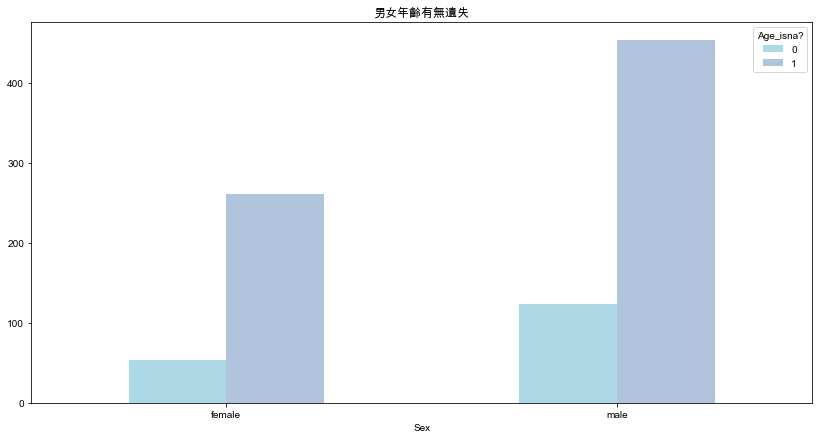

In [39]:
train.groupby(['Sex', 'Age_isna?']).size().unstack().plot(kind = 'bar', color = ['lightblue', 'lightsteelblue']
                                                                        , figsize = (14, 7))
plt.xticks(rotation = 0)
plt.title('男女年齡有無遺失')
plt.show()
# 男生年齡的遺失值較多

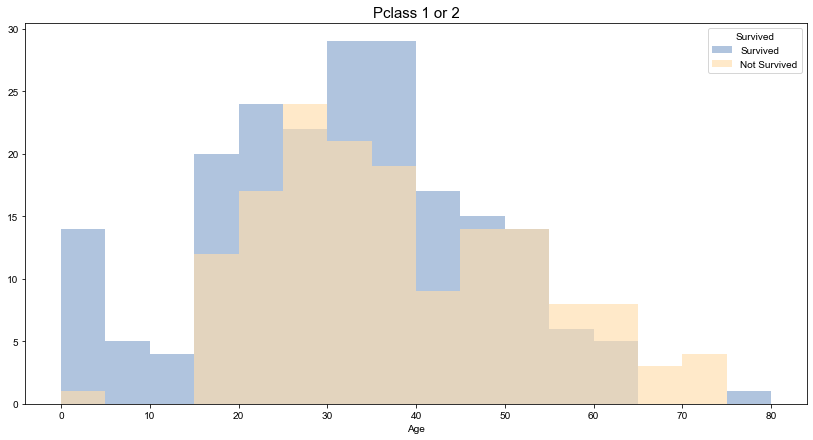

In [40]:
Age_12_sur = (train['Age_isna?'] == 1) & (train['Pclass'] != 3) & (train['Survived'] == 1)
Age_12_nosur = (train['Age_isna?'] == 1) & (train['Pclass'] != 3) & (train['Survived'] == 0)

plt.figure(figsize = (14, 7))
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
plt.hist(train.loc[Age_12_sur, 'Age'], bins = bins, color = 'lightsteelblue', label='Survived')
plt.hist(train.loc[Age_12_nosur, 'Age'], bins = bins, alpha = 0.65, color = 'navajowhite', label='Not Survived')

plt.title("Pclass 1 or 2", fontsize = 15)
plt.xlabel('Age')
plt.legend(title = 'Survived')
plt.show()

# 年齡和是否生存有關
# 20歲以下生存率較高

In [41]:
# 稱謂的年齡中位數  平均值易受極值影響
Age_median = train.groupby('honorific')[['honorific', 'Age']].median()
Age_median.columns = ['Age Median']
Age_median.reset_index(inplace = True)

display(Age_median)

,honorific,Age Median
0,Master,3.5
1,Miss,21.0
2,Mr,30.0
3,Mrs,35.0
4,other,48.0


In [42]:
# 補年齡的遺失值
train.loc[(train.Age.isnull()) & (train.honorific == 'Master'), 'Age'] = Age_median.loc[Age_median.honorific == 'Master', 'Age Median'][0]
train.loc[(train.Age.isnull()) & (train.honorific == 'Miss'), 'Age'] = Age_median.loc[Age_median.honorific == 'Miss', 'Age Median'][1]
train.loc[(train.Age.isnull()) & (train.honorific == 'Mr'), 'Age'] = Age_median.loc[Age_median.honorific == 'Mr', 'Age Median'][2]
train.loc[(train.Age.isnull()) & (train.honorific == 'Mrs'), 'Age'] = Age_median.loc[Age_median.honorific == 'Mrs', 'Age Median'][3]
train.loc[(train.Age.isnull()) & (train.honorific == 'other'), 'Age'] = Age_median.loc[Age_median.honorific == 'other', 'Age Median'][4]

In [43]:
# 性別轉成 0/1, Embarked轉成 0/1/2
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# for i in ['Sex', 'Embarked']:
#     train[i] = labelencoder.fit_transform(train[i])
# #train['Sex'] = labelencoder.fit_transform(train['Sex'])

# train.head(10)

In [44]:
# 創造出 one-hot 欄位
dummy = pd.get_dummies(train['Sex'])
train = pd.concat([train, dummy], axis = 1)
train = train.drop(["Sex"], axis = 1)

dummy2 = pd.get_dummies(train['Embarked'])
train = pd.concat([train, dummy2], axis = 1)
train = train.drop(["Embarked"], axis = 1)
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,honorific,Age_isna?,female,male,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,1,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,1,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,1,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,1,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,1,0,1,0,0,1


In [45]:
# check
train.Age.isnull().sum()

0

In [46]:
train = train.drop(columns=['Name', 'Ticket', 'honorific', 'Age_isna?'])
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

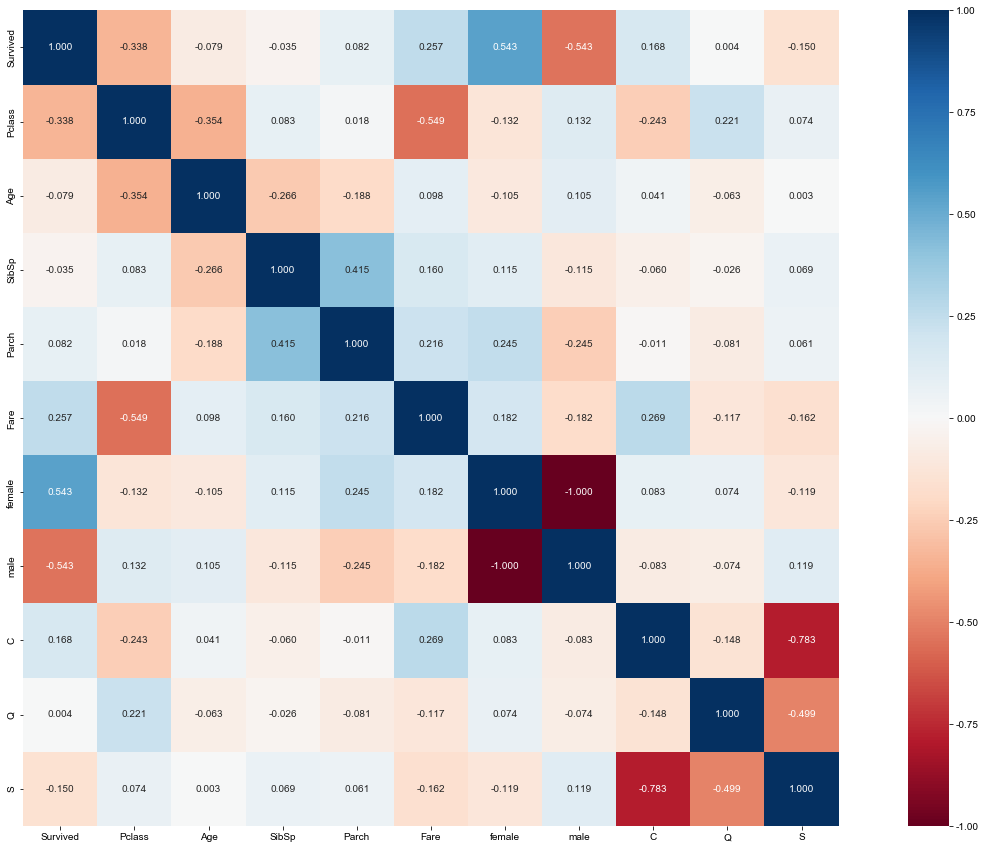

In [47]:
# 各欄的相關係數
plt.figure(figsize = (25, 15))
sns.heatmap(train.astype(float).corr(), fmt='.3f', 
            center=0, cmap="RdBu", annot=True, square=True)

## Test data

In [48]:
# 同train資料處理
import re
regex = re.compile(' ([A-Za-z]+)\.')
test['honorific'] = test['Name'].map(lambda x: regex.search(x)[0])
test['honorific'] = test['honorific'].map(lambda x: x[1:][:-1])

test['honorific'] = test['honorific'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess',
                                               'Capt', 'Ms', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'], 'other')
test['honorific'] = test['honorific'].replace(['Miss', 'Mlle'], 'Miss')
test['honorific'] = test['honorific'].replace('Mme', 'Mrs')

In [49]:
Age_median_t = test.groupby('honorific')[['honorific', 'Age']].median()
Age_median_t.columns = ['Age Median']
Age_median_t.reset_index(inplace = True)

display(Age_median_t)

,honorific,Age Median
0,Master,7.0
1,Miss,22.0
2,Mr,28.5
3,Mrs,36.5
4,other,44.0


In [50]:
test.loc[(test.Age.isnull()) & (test.honorific == 'Master'), 'Age'] = Age_median_t.loc[Age_median.honorific == 'Master', 'Age Median'][0]
test.loc[(test.Age.isnull()) & (test.honorific == 'Miss'), 'Age'] = Age_median_t.loc[Age_median.honorific == 'Miss', 'Age Median'][1]
test.loc[(test.Age.isnull()) & (test.honorific == 'Mr'), 'Age'] = Age_median_t.loc[Age_median.honorific == 'Mr', 'Age Median'][2]
test.loc[(test.Age.isnull()) & (test.honorific == 'Mrs'), 'Age'] = Age_median_t.loc[Age_median.honorific == 'Mrs', 'Age Median'][3]
test.loc[(test.Age.isnull()) & (test.honorific == 'other'), 'Age'] = Age_median_t.loc[Age_median.honorific == 'other', 'Age Median'][4]

In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [52]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# for i in ['Sex', 'Embarked']:
#     test[i] = labelencoder.fit_transform(test[i])

# 性別和登船地點轉虛擬變數
dummy = pd.get_dummies(test['Sex'])
test = pd.concat([test, dummy], axis = 1)
test = test.drop(["Sex"], axis = 1)

dummy2 = pd.get_dummies(test['Embarked'])
test = pd.concat([test, dummy2], axis = 1)
test = test.drop(["Embarked"], axis = 1)
test.head()

# Cabin遺失值太多，故直接刪掉
test.drop(columns=['Name', 'Ticket', 'Cabin', 'honorific'], inplace=True, axis = 1)
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].median()

In [53]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [54]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


### Model

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train.drop(['Survived'], axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.1)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

scores = {}
for model in [LogisticRegression(), 
              RandomForestClassifier(random_state=0),
              LinearSVC(dual=False),
              KNeighborsClassifier(n_neighbors=4),
              DecisionTreeClassifier(random_state=0, criterion='entropy')]:

    fit_model = model.fit(X_train, y_train.values)
    scores = cross_val_score(fit_model, X_train, y_train, cv = 5)
    y_pred = fit_model.predict(X_test)
    m = confusion_matrix(y_test, y_pred)
    
    print('{} Train Accuracy = {:.3f}'.format(fit_model.__class__.__name__, fit_model.score(X_train, y_train)))
    print('{} Test Accuracy = {:.3f}'.format(fit_model.__class__.__name__, fit_model.score(X_test, y_test)))
    print('Cross validation scores = ', scores)
    print('Cross validation scores(Mean) = {:.3f}'.format(scores.mean()))
    print('Confusion Matrix =\n', format(m))
    print()
    

LogisticRegression Train Accuracy = 0.803
LogisticRegression Test Accuracy = 0.788
Cross validation scores =  [0.7972028  0.82517483 0.78873239 0.76056338 0.81690141]
Cross validation scores(Mean) = 0.798
Confusion Matrix =
 [[95 15]
 [23 46]]

RandomForestClassifier Train Accuracy = 0.982
RandomForestClassifier Test Accuracy = 0.788
Cross validation scores =  [0.86713287 0.8041958  0.79577465 0.78169014 0.78873239]
Cross validation scores(Mean) = 0.808
Confusion Matrix =
 [[97 13]
 [25 44]]

LinearSVC Train Accuracy = 0.799
LinearSVC Test Accuracy = 0.793
Cross validation scores =  [0.7972028  0.82517483 0.78873239 0.75352113 0.81690141]
Cross validation scores(Mean) = 0.796
Confusion Matrix =
 [[97 13]
 [24 45]]

KNeighborsClassifier Train Accuracy = 0.858
KNeighborsClassifier Test Accuracy = 0.799
Cross validation scores =  [0.82517483 0.82517483 0.82394366 0.78169014 0.8028169 ]
Cross validation scores(Mean) = 0.812
Confusion Matrix =
 [[102   8]
 [ 28  41]]

DecisionTreeClassifier

In [56]:
# 找最好的隨機森林模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
para_grid = {
    'max_depth':list(range(5, 11)),
    'n_estimators':list(range(10, 31)),
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

mod = RandomForestClassifier(random_state=0)
gs = GridSearchCV(estimator = mod, param_grid = para_grid, cv = 10)
gs.fit(X_train, y_train)

print('Best cross validation score ={:.3f}'.format(gs.best_score_))
print('Best parameters ={}'.format(gs.best_params_))

Best cross validation score =0.838
Best parameters ={'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 11}


train Accuracy = 0.903
test Accuracy = 0.744
Confusion Matrix =
 [[47  8]
 [15 20]]
AUC = 0.713
Cross validation scores =  [0.76666667 0.82022472 0.75280899 0.87640449 0.87640449 0.7752809
 0.83146067 0.79775281 0.88764045 0.84269663]
Cross validation scores(Mean) = 0.823


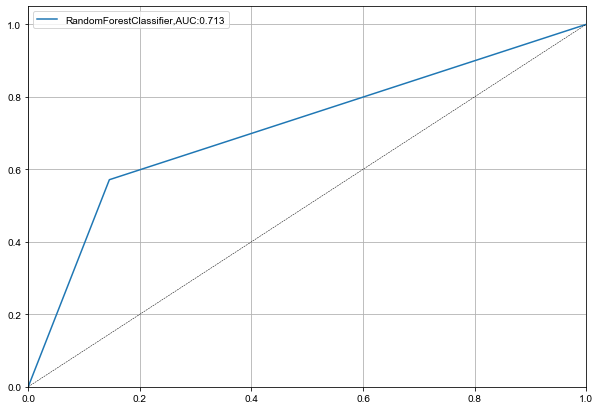

In [63]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

model = RandomForestClassifier(max_depth = 8, n_estimators=11, max_features = 'auto', random_state=0, 
                               criterion='entropy') 
fit_model = model.fit(X_train, y_train)
y_pred = fit_model.predict(X_test)
m = confusion_matrix(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
scores = cross_val_score(fit_model, X_train, y_train, cv = 10)

#print('OOB score = {:.3f}'.format(fit_model.oob_score_))
print('train Accuracy = {:.3f}'.format(fit_model.score(X_train, y_train)))
print('test Accuracy = {:.3f}'.format(fit_model.score(X_test, y_test)))
print('Confusion Matrix =\n', m)
print('AUC = {:.3f}'.format(auc))
print('Cross validation scores = ', scores)
print('Cross validation scores(Mean) = {:.3f}'.format(scores.mean()))

plt.figure(figsize = (10, 7))   
plt.plot(fpr, tpr, label = fit_model.__class__.__name__ + ',AUC:' + str(round(auc, 3)))
plt.plot([0, 1], [0,1], color = 'black', lw = 0.5, linestyle = '--')  # No model
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)

# AUC = 0.713-->分類效果好

In [58]:
from sklearn.metrics import accuracy_score
print("預測:", y_pred)
print("正確標籤:", list(y_test))
print("正確率: {:.3f}".format(accuracy_score(y_test, y_pred) * 100), "%")

預測: [0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1]
正確標籤: [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
正確率: 74.444 %


In [65]:
from sklearn.tree import DecisionTreeClassifier
para_grid2 = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : list(range(5, 11)),
              'criterion' :['gini', 'entropy']
             }
                                 
mod2 = DecisionTreeClassifier(random_state=0)
gs2 = GridSearchCV(estimator = mod2, param_grid = para_grid2, cv = 5)
gs2.fit(X_train, y_train)
print('Best cross validation score ={:.3f}'.format(gs2.best_score_))
print('Best parameters ={}'.format(gs2.best_params_))

Best cross validation score =0.812
Best parameters ={'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}


train Accuracy = 0.825
test Accuracy = 0.778
Confusion Matrix =
 [[53  2]
 [18 17]]
AUC = 0.725
Cross validation scores =  [0.78881988 0.8125     0.84375    0.83125    0.78125   ]
Cross validation scores(Mean) = 0.812


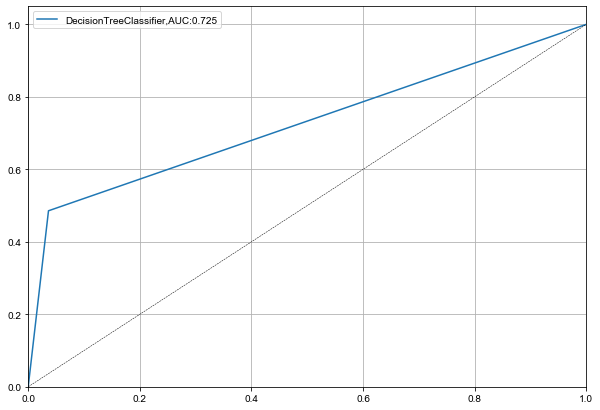

In [66]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
model2 = DecisionTreeClassifier(max_depth = 5, max_features = 'auto', random_state=0, criterion='gini') 
fit_model2 = model2.fit(X_train, y_train)
y_pred = fit_model2.predict(X_test)
m = confusion_matrix(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
scores = cross_val_score(fit_model2, X_train, y_train, cv = 5)

print('train Accuracy = {:.3f}'.format(fit_model2.score(X_train, y_train)))
print('test Accuracy = {:.3f}'.format(fit_model2.score(X_test, y_test)))
print('Confusion Matrix =\n', m)
print('AUC = {:.3f}'.format(auc))
print('Cross validation scores = ', scores)
print('Cross validation scores(Mean) = {:.3f}'.format(scores.mean()))

plt.figure(figsize = (10, 7))   
plt.plot(fpr, tpr, label = fit_model2.__class__.__name__ + ',AUC:' + str(round(auc, 3)))
plt.plot([0, 1], [0,1], color = 'black', lw = 0.5, linestyle = '--')  # No model
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
# 決策樹預測能力很差！

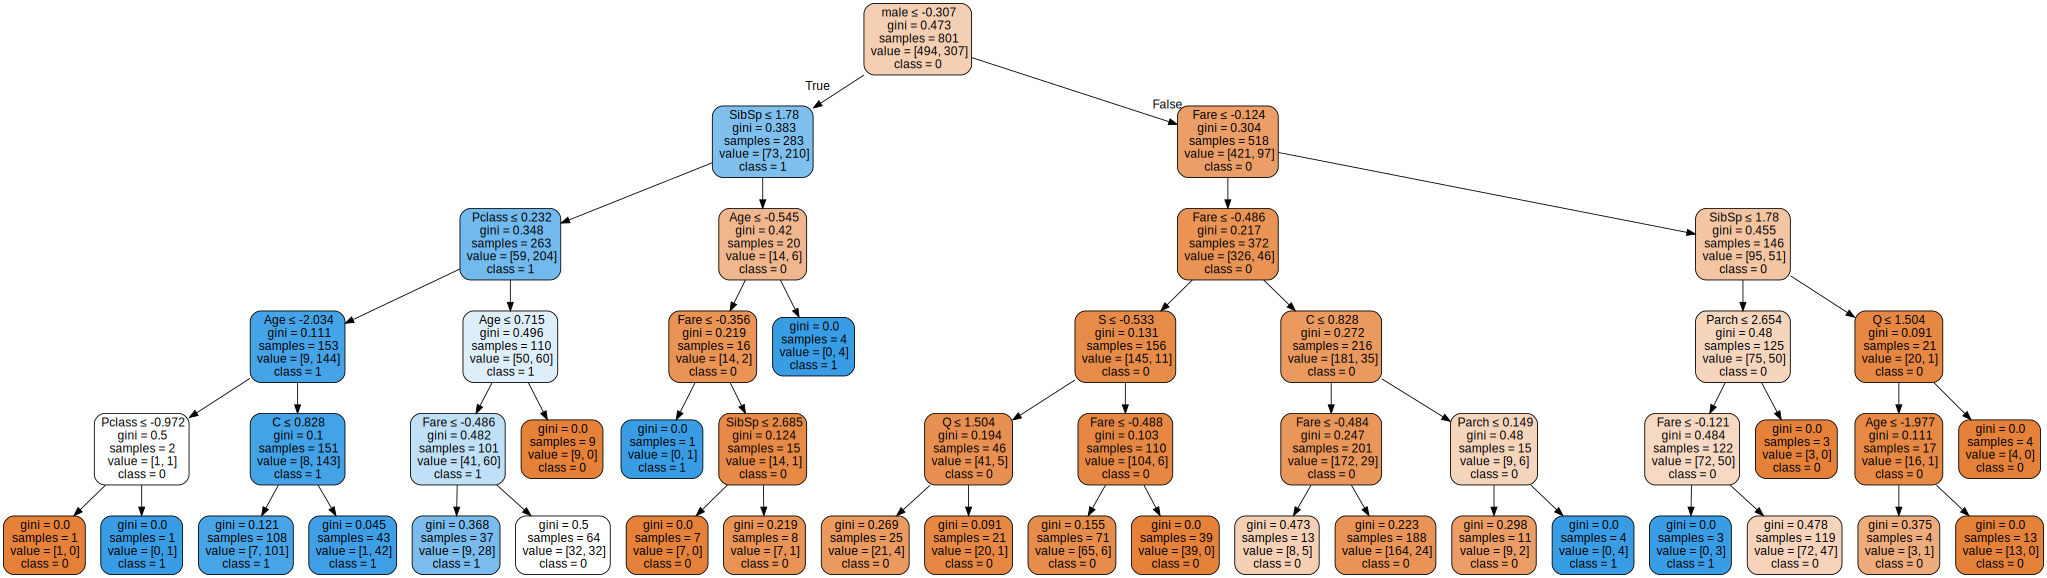

In [67]:
from sklearn.tree import export_graphviz
import pydot
import graphviz
g = export_graphviz(fit_model2, out_file=None, feature_names=train.drop('Survived', axis = 1).columns
                    , class_names=['0', '1'], filled=True, special_characters=True, rounded = True, impurity = True)
graph = graphviz.Source(g)
graph

### Predict

In [64]:
result = pd.DataFrame(columns = ["PassengerId", "Survived"])
result["PassengerId"] = test["PassengerId"]
test = test.drop('PassengerId', axis = 1)

fit_model = model.fit(train.drop('Survived', axis = 1), train['Survived'])
# 預測測試集資料
Test_pred = fit_model.predict(test)

result["Survived"] = Test_pred
# 提交檔案
result.to_csv("Survived.csv", index = False)

# 檢視預測罹難或生還的機率
print(fit_model.predict_proba(test))


# submit = test[['PassengerId']]
# submit['Survived'] = fit_model.predict(test)
# submit.to_csv('Survived.csv', index=False)
# print()
# print('預測結果：')
# submit.head(10)

[[0.94215772 0.05784228]
 [0.89752066 0.10247934]
 [0.88798821 0.11201179]
 [0.81999135 0.18000865]
 [0.37270349 0.62729651]
 [0.79362248 0.20637752]
 [0.56324561 0.43675439]
 [0.84840103 0.15159897]
 [0.31143815 0.68856185]
 [0.93212446 0.06787554]
 [0.89598004 0.10401996]
 [0.87741195 0.12258805]
 [0.         1.        ]
 [0.86747799 0.13252201]
 [0.         1.        ]
 [0.11195286 0.88804714]
 [0.96267078 0.03732922]
 [0.7340792  0.2659208 ]
 [0.67634396 0.32365604]
 [0.62030303 0.37969697]
 [0.58193539 0.41806461]
 [0.64545455 0.35454545]
 [0.04040404 0.95959596]
 [0.55989855 0.44010145]
 [0.18181818 0.81818182]
 [0.95757576 0.04242424]
 [0.         1.        ]
 [0.81788602 0.18211398]
 [0.60265461 0.39734539]
 [0.88299201 0.11700799]
 [0.95571329 0.04428671]
 [0.90066278 0.09933722]
 [0.43680639 0.56319361]
 [0.62640508 0.37359492]
 [0.42687643 0.57312357]
 [0.6524151  0.3475849 ]
 [0.67112473 0.32887527]
 [0.67112473 0.32887527]
 [0.92510498 0.07489502]
 [0.72451636 0.27548364]
